In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
beers = pd.read_csv(open('../data/alkon-hinnasto-tekstitiedostona.csv'), sep=',', skiprows=3)

0         True
1        False
2        False
3        False
4        False
         ...  
11242    False
11243    False
11244    False
11245    False
11246    False
Name: Numero, Length: 11247, dtype: bool

In [133]:
vects = pickle.load(open('../data/word_vec_binary.bin', 'rb'))

In [134]:
vects_xy = {}
mid = 150
for v in vects.keys():
    vf = vects[v].flatten()
    a,b = vf[150:], vf[:150]
    vects_xy[v] = np.array((np.sum(a), np.sum(b)))
print(len(vects), len(vects_xy))

1153 1153


In [186]:
def reduce(x, mid=150):
    t = x.flatten()
    a,b = t[mid:], t[:mid]
    return np.array((np.sum(a), np.sum(b)))

def findBeerCountry(b):
    return beers[beers['Numero'] == b]['Valmistusmaa'].iloc[0]

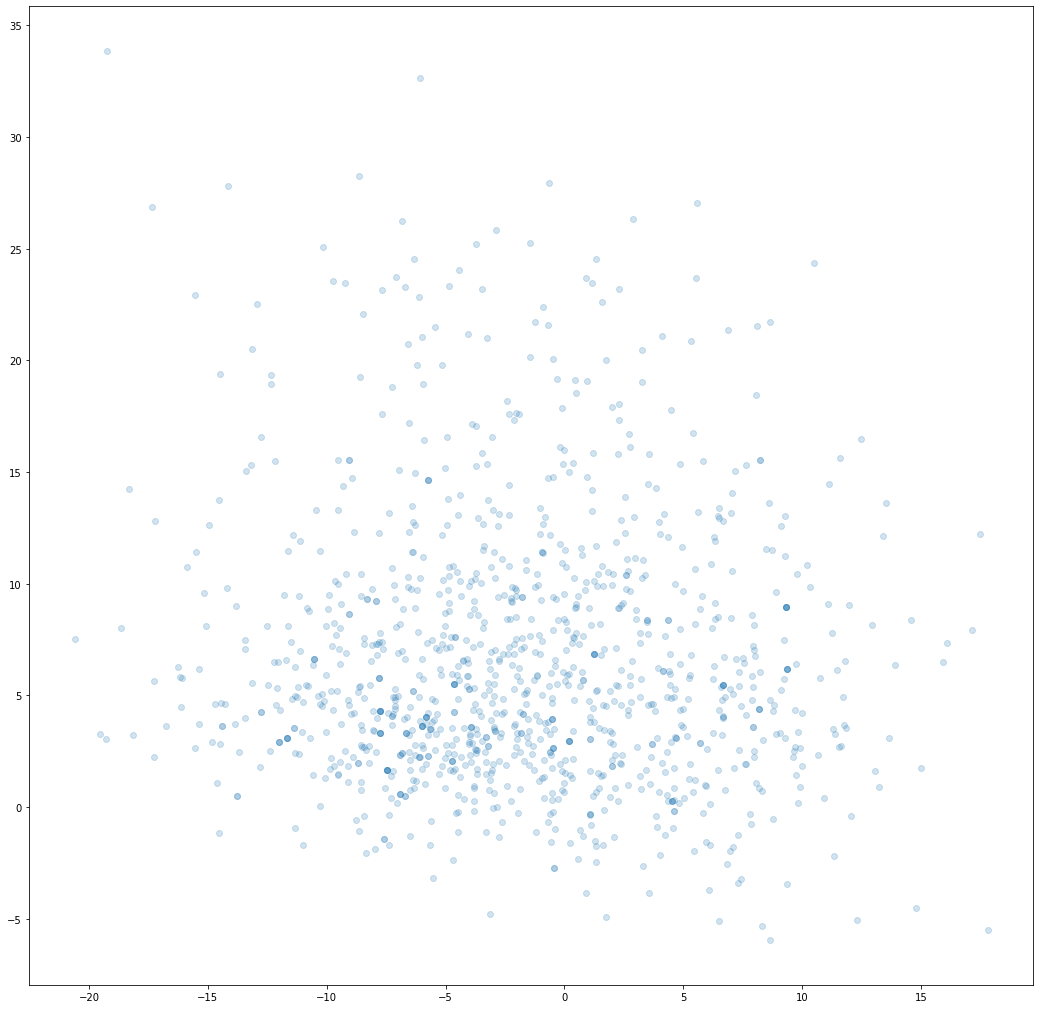

In [187]:
data = np.array(list(vects_xy.values()))
plt.figure(figsize=(18,18))
plt.scatter(data[:,0], data[:,1], alpha=0.2)

In [188]:
countries = pickle.load(open('../data/country_vect_dict.bin', 'rb'))

In [189]:
maat = list(countries.values())

In [190]:
m1, m2 = reduce(maat[0]), reduce(maat[1])

In [191]:
dataWeightedCountry = data.copy()

In [192]:
dataWeightedCountry1 = dataWeightedCountry[:576,] * math.sqrt(np.sum(m1))
dataWeigtedCountry2 = dataWeightedCountry[576:] * math.sqrt(np.sum(m2))


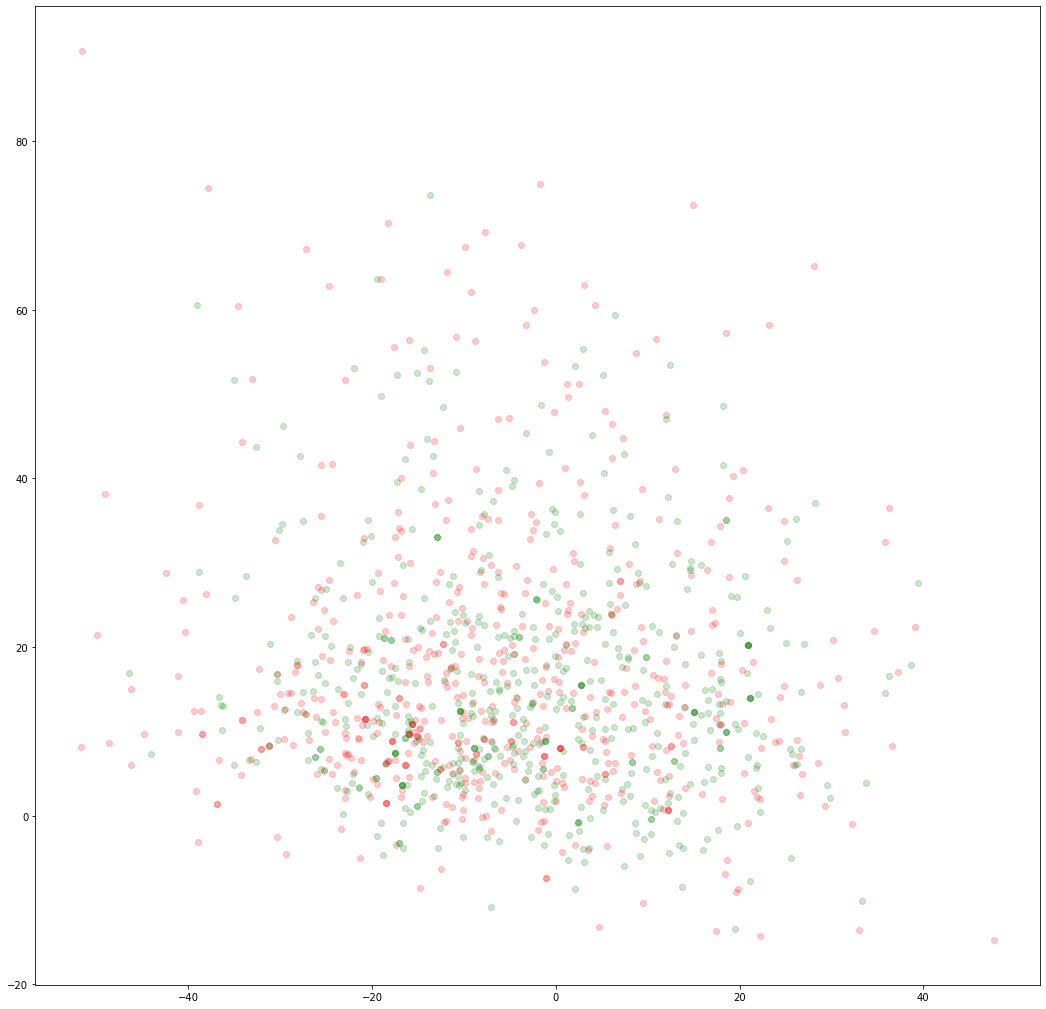

In [193]:
plt.figure(figsize=(18,18))
plt.scatter(dataWeightedCountry1[:,0], dataWeightedCountry1[:,1], alpha=0.2, color='red')
plt.scatter(dataWeigtedCountry2[:,0], dataWeigtedCountry2[:,1], alpha=0.2, color='green')


In [263]:
from __future__ import annotations
from typing import Tuple
import pandas as pd
import pickle
import numpy as np
from scipy import spatial
import sklearn as skl
import os
import json
import fasttext
import fasttext.util
import string
import math
from nltk.corpus import stopwords
import nltk
from translate import Translator
translator= Translator(to_lang="en", from_lang="fi")
stops = set(stopwords.words('english'))
stops.add('notes')
stops.add('note')
stops.add('hint')
stops.add('hints')
wmd = fasttext.load_model('../glove/wiki.en/wiki.en.bin')

In [264]:
dffi = pd.read_table(open('../data/countriesFI', 'r'), names=['country_FI'])
dfen = pd.read_table(open('../data/countriesEN', 'r'), names=['country_EN'])
df_countries = dffi.join(dfen)                 

In [273]:
pickle.dump( df_countries, open('../data/country_vect_df.bin','wb'))